In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors as colors
import pandas as pd
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer as Tfidf
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.decomposition import PCA
import seaborn as sea
%matplotlib inline

In [3]:
#read datasets in
twitter = pd.read_csv("./datasets/twitter_sample.csv")
twitter_clone = pd.read_csv("./datasets/twitterclone_to_1000.csv")

In [4]:
#check their size
print "Shape of twitter set:", twitter.shape, " Shape of dark web twitter clone set:", twitter_clone.shape
print twitter.head()

Shape of twitter set: (99999, 4)  Shape of dark web twitter clone set: (23728, 4)
           id                     timestamp             user  \
0  1467810369  Mon Apr 06 22:19:45 PDT 2009  _TheSpecialOne_   
1  1467810672  Mon Apr 06 22:19:49 PDT 2009    scotthamilton   
2  1467810917  Mon Apr 06 22:19:53 PDT 2009         mattycus   
3  1467811184  Mon Apr 06 22:19:57 PDT 2009          ElleCTF   
4  1467811193  Mon Apr 06 22:19:57 PDT 2009           Karoli   

                                             content  
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1  is upset that he can't update his Facebook by ...  
2  @Kenichan I dived many times for the ball. Man...  
3    my whole body feels itchy and like its on fire   
4  @nationwideclass no, it's not behaving at all....  


In [5]:
#vectorize clearweb tweets

vectorizer = CountVectorizer(stop_words='english', binary=True) #ignores stop words such as "a," "the," etc.
posts = twitter['content'].values


#tokenize words
tokens = vectorizer.fit_transform([unicode(a, errors='replace') for a in posts])

#get word frequencies
frequencies = zip(vectorizer.get_feature_names(), 
                  np.array(tokens.sum(axis=0)).ravel()) #learned from documentation on scipy arrays

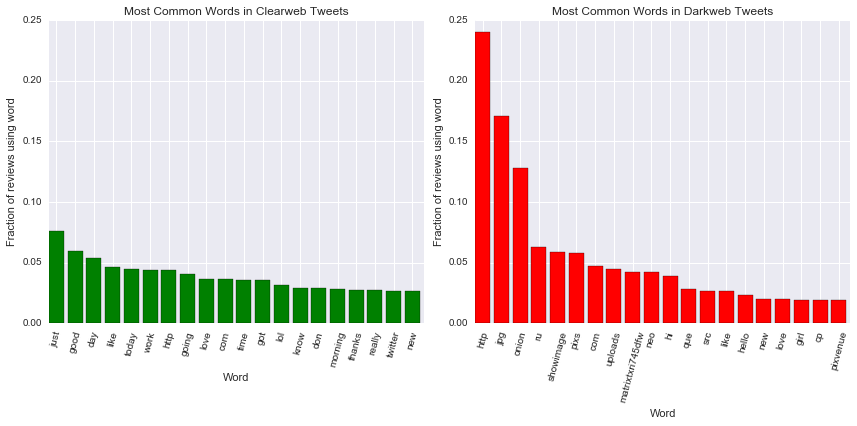

In [15]:
def freq_plt(axis, title, freq, tok_size, color): #generates bar graphs as per schema above
    
    x_lab = np.arange(20)
    words, incidences = zip(*freq[:20])
    incidences = np.array(incidences)
    
    axis.bar(x_lab, incidences/float(tok_size), color=color)
    axis.set_xticks(x_lab+.4)
    axis.set_xticklabels(words)
    axis.set_title(title)
    axis.set_xlabel("Word")
    axis.set_ylim(0,0.25)
    axis.set_ylabel("Fraction of reviews using word")


c_revs = twitter['content'].values #clearweb tweets
d_revs = twitter_clone['content'].values #darkweb tweets

c_tokens = vectorizer.fit_transform([unicode(a, errors='replace') for a in c_revs]) #tokenize and get words by frequency
c_freq = sorted(zip(vectorizer.get_feature_names(), np.array(c_tokens.sum(axis=0)).ravel()), key=lambda x: -x[1])

d_tokens = vectorizer.fit_transform([unicode(str(a), errors='replace') for a in d_revs]) #tokenize and get words by frequency
d_freq = sorted(zip(vectorizer.get_feature_names(), np.array(d_tokens.sum(axis=0)).ravel()), key=lambda x: -x[1])

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

freq_plt(ax[0], "Most Common Words in Clearweb Tweets", c_freq, c_tokens.shape[0], "green")
freq_plt(ax[1], "Most Common Words in Darkweb Tweets", d_freq, d_tokens.shape[0], "red")


for ax in fig.axes: #plot most common words
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=75)
    
plt.tight_layout()
fig.savefig('Twitter_Words.png', dpi=900, bbox_inches='tight')

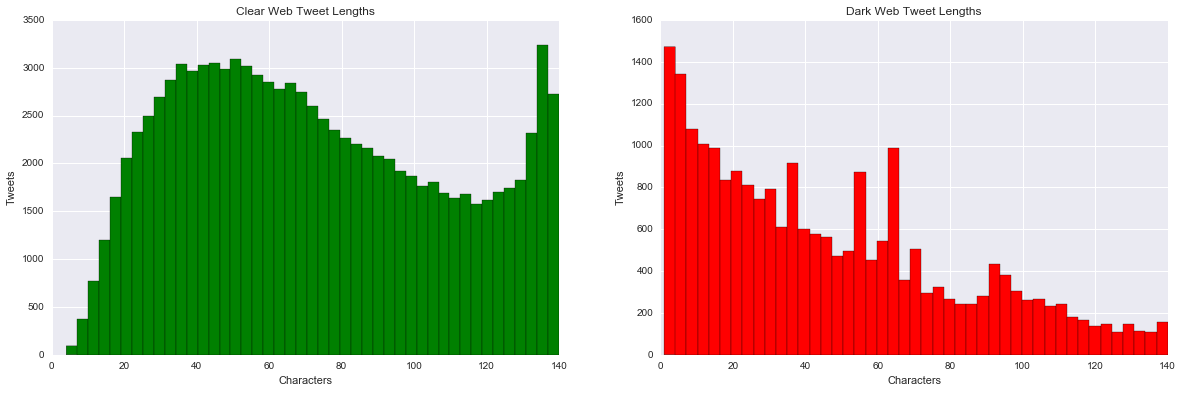

In [16]:
c_lens = [] #clearweb tweet lengths
d_lens = [] #darkweb tweet lengths

for post in twitter['content'].values:
    length = len(str(post).strip())
    if length <= 140:
        c_lens.append(length)
        
for post in twitter_clone['content'].values:
    length = len(str(post).strip())
    if length <= 140:
        d_lens.append(length)
        
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].hist(c_lens, bins=45, color='green')
ax[0].set_xlim(0, 140)
ax[0].set_title('Clear Web Tweet Lengths')
ax[0].set_xlabel("Characters")
ax[0].set_ylabel("Tweets")

ax[1].hist(d_lens, bins=45, color='red')
ax[1].set_xlim(0, 140)
ax[1].set_title('Dark Web Tweet Lengths')
ax[1].set_xlabel("Characters")
ax[1].set_ylabel("Tweets")

plt.show()
fig.savefig('twitter_lengths.png', dpi=900, bbox_inches='tight')

In [8]:
o_links = 0

for post in twitter['content'].values:
    if 'http' in str(post):
        o_links += 1
        
print o_links/float(twitter.shape[0])*100,"% of Clear Web tweets contain links"

d_links = 0

for post in twitter_clone['content'].values:
    if 'http' in str(post):
        d_links += 1
        
print d_links/float(twitter_clone.shape[0])*100,"% of Dark Web tweets contain links"

4.39104391044 % of Clear Web tweets contain links
25.2950101146 % of Dark Web tweets contain links


In [9]:
twitter_clone.head()

,content,id,timestamp,user
0,cool,36457,1479680486,Ajio
1,hipocresia total,36456,1479678518,thebipolar007
2,#girls,36455,1479677886,BASON444
3,#HARDCANDY,36454,1479677835,BASON444
4,#14',36453,1479677807,BASON444
